# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [5]:
# Your code here - load the dataset
import pandas as pd

ames = pd.read_csv('ames.csv', index_col=0)

Visually inspect `ames` (it's ok if you can't see all of the columns).

In [6]:
# Your code here
ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [19]:
# Your code here - drop columns with missing data
ames = ames.dropna(axis='columns')
ames

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [81]:
# Your code here - continuous numeric predictor
ames.select_dtypes('number')


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


In [75]:
ames['LotArea'].value_counts()

LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64

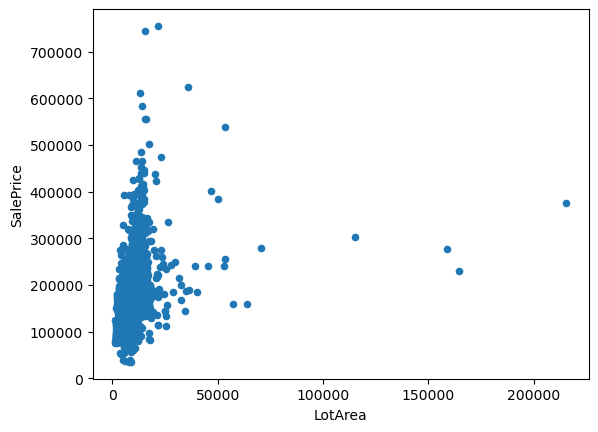

In [76]:
ames.plot.scatter(x="LotArea", y="SalePrice");

In [79]:
ames['GrLivArea'].value_counts()

GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: count, Length: 861, dtype: int64

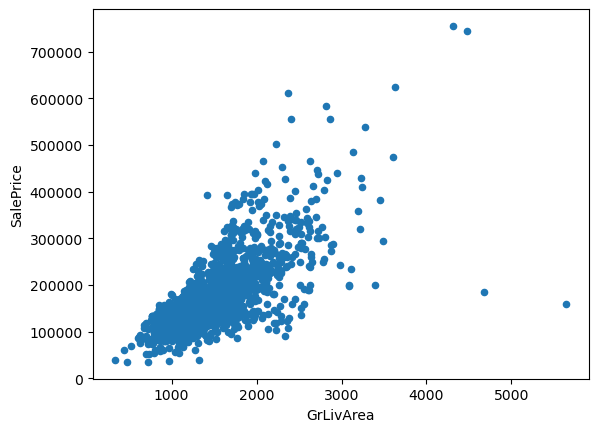

In [80]:
ames.plot.scatter(x="GrLivArea", y="SalePrice");

In [82]:
# looks like a linear relationship. 

### Discrete Numeric Predictor

In [61]:
# Your code here - discrete numeric predictor
ames.select_dtypes('int64').columns


# 'OverallQual', 'OverallCond'

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

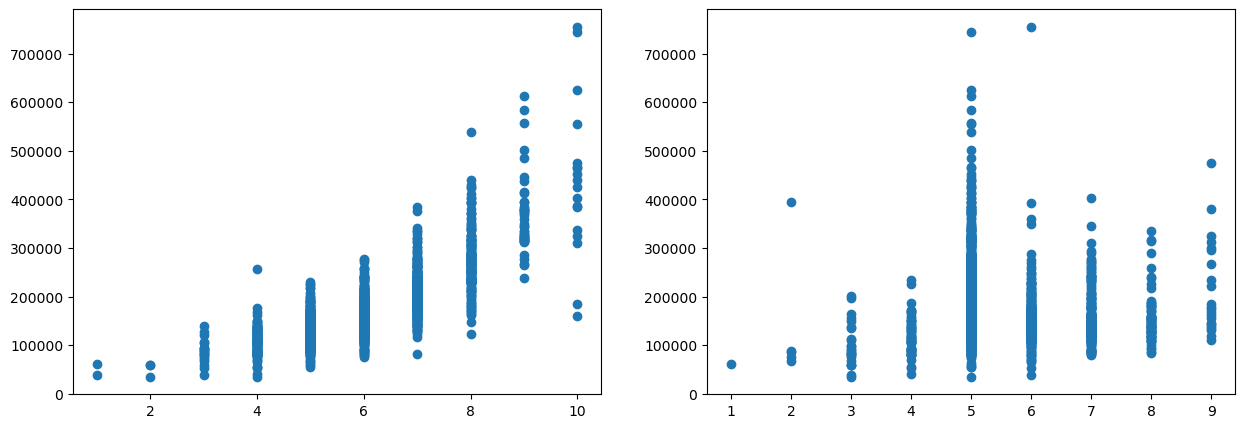

In [84]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(15,5))


axes[0].scatter(x=ames["OverallQual"], y = ames["SalePrice"])
axes[1].scatter(x=ames["OverallCond"], y = ames["SalePrice"])

In [85]:
# OverallQual looks linear. It does seem like a quality of
# 8 is "twice as much" as a quality of 4. Let's call that our
# discrete numeric predictor.


### String Categorical Predictor

In [86]:
# Your code here - string categorical predictor
ames.select_dtypes('object')

# 27 string categorical

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [89]:
ames.select_dtypes('object').nunique().sort_values()

Street            2
Utilities         2
CentralAir        2
LandSlope         3
PavedDrive        3
LotShape          4
LandContour       4
KitchenQual       4
ExterQual         4
MSZoning          5
LotConfig         5
BldgType          5
HeatingQC         5
ExterCond         5
Heating           6
Foundation        6
SaleCondition     6
RoofStyle         6
Functional        7
HouseStyle        8
Condition2        8
RoofMatl          8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

In [92]:
ames['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

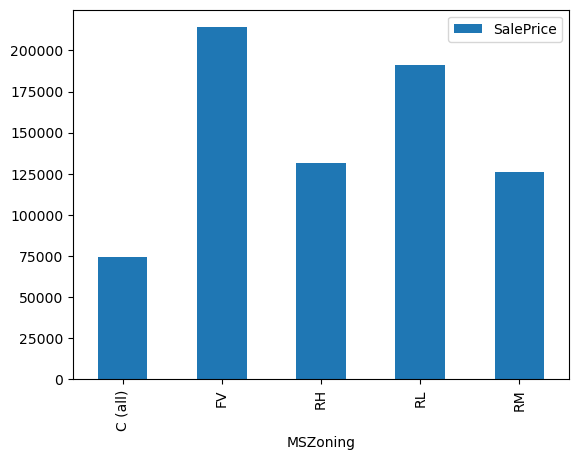

In [97]:
# lets plot 
ames.groupby('MSZoning').mean('MSZoning').sort_index().plot.bar(y='SalePrice');

### Discrete Categorical Predictor

In [98]:
# Your code here - discrete categorical predictor
ames.select_dtypes("number").nunique().sort_values()
# MSSubClass, 

HalfBath            3
BsmtHalfBath        3
FullBath            4
Fireplaces          4
KitchenAbvGr        4
BsmtFullBath        4
GarageCars          5
YrSold              5
PoolArea            8
BedroomAbvGr        8
OverallCond         9
OverallQual        10
MoSold             12
TotRmsAbvGrd       12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
dtype: int64

<Axes: xlabel='MSSubClass'>

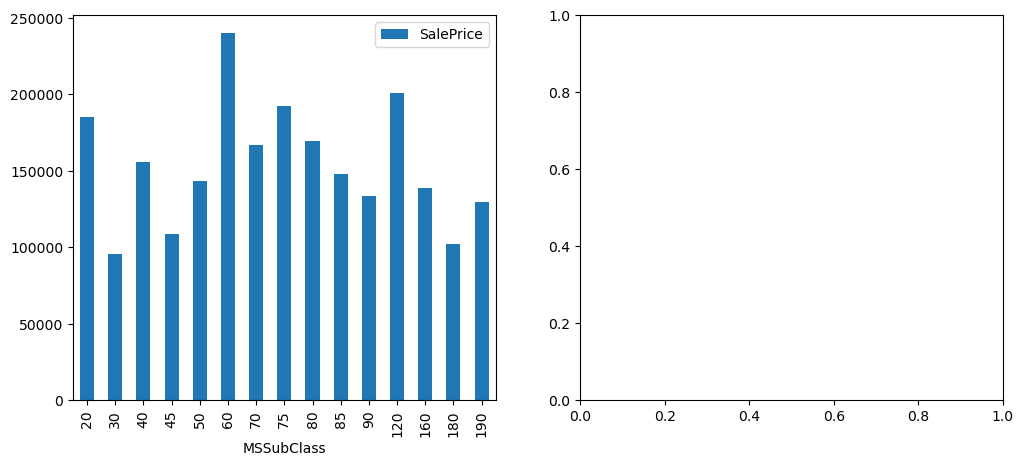

In [99]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ames.groupby('MSSubClass').mean('MSSubClass').plot.bar(y='SalePrice', ax=ax1)

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [110]:
# Your code here - prepare X and y, including one-hot encoding
y = ames['SalePrice']
X = ames[['GrLivArea', 'OverallQual', 'MSZoning']]
X


,GrLivArea,OverallQual,MSZoning
Id,,,
1,1710,7,RL
2,1262,6,RL
3,1786,7,RL
4,1717,7,RL
5,2198,8,RL
...,...,...,...
1456,1647,6,RL
1457,2073,6,RL
1458,2340,7,RL


In [111]:
X = pd.get_dummies(X, columns=['MSZoning'], dtype=int)


In [112]:
X = X.drop('MSZoning_RL',axis=1)

In [115]:
# Your answer here - which category or categories were dropped?

""" MSZoning_RL dropped . To be used as baseline category"""

' MSZoning_RL dropped . To be used as baseline category'

In [116]:
# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
model_results = model.fit()

print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     659.8
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:55:09   Log-Likelihood:                -17584.
No. Observations:                1460   AIC:                         3.518e+04
Df Residuals:                    1453   BIC:                         3.522e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8.942e+04   5209.525  

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

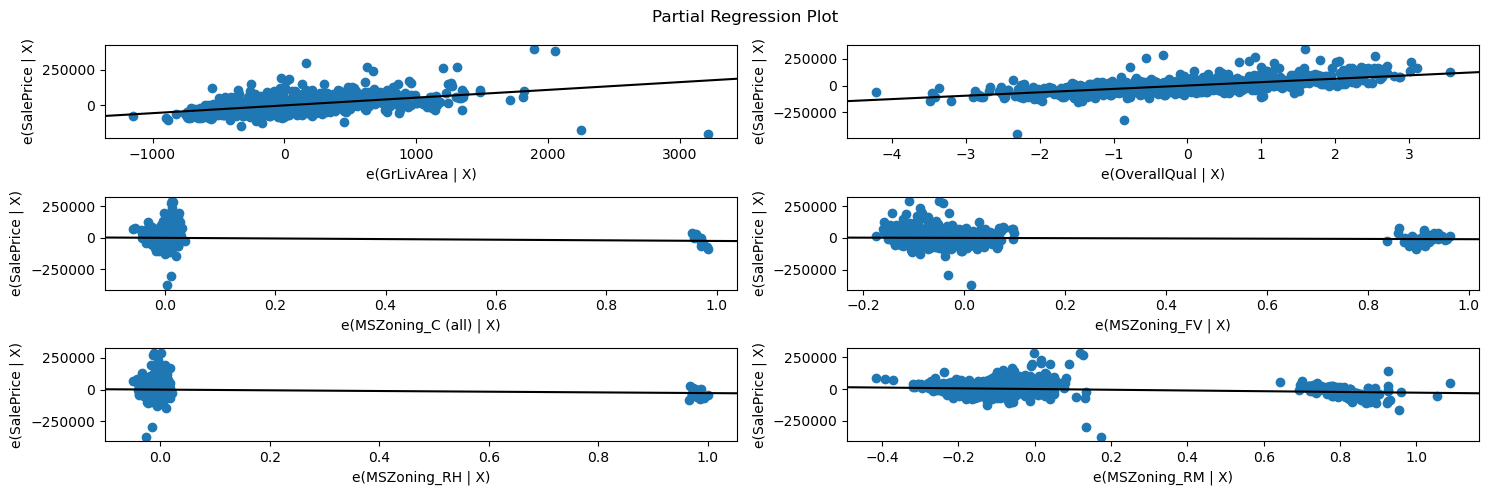

In [119]:
# Your code here - create partial regression plots
fig = plt.figure(figsize=(15,5))

sm.graphics.plot_partregress_grid(model_results, exog_idx=['GrLivArea', 'OverallQual', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM'], fig=fig)
plt.tight_layout()
plt.show()


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [121]:
# Your code here - calculate an error-based metric
from sklearn.metrics import mean_absolute_error

y_pred = model_results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)

27825.06245329316

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [36]:
# Your answer here
"""
Our model is statistically significant overall, and explains about 72% of the
variance in SalePrice. On average it is off by about $28k in its predictions
of home price. 

Coefficients MSZoning_C (all) and MSZoning_FV are not statistically significant

We can say that:
const:

GrLivArea: For each increase of 1 sqft in above-grade living area, we see an
           associated increase of about $55 in sale price

OverallQual: For each increase of 1 in overall quality, we see an associated
             increase of about $32k in sale price

"""

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.